In [3]:
#######################################################################################
## Script written by Gabrielle G. Jones and edited by Schuyler R. Borges
#######################################################################################

import matplotlib.pyplot as plt 
import glob
import numpy as np 
from astropy.io import ascii 
from astropy.table import Table
from astropy.table import Column

#######################################################################################
# List of definition functions to run first

# Definition function that takes a .rad file from SMART and calculates the reflectance 
# by dividing the radiance from the flux. The output of the definition function are reflectance 
# and radiance values for an entire column of data.
def getData(data):     # Input data
    
    columnfour = []    # Builds empty list for column four, radiance, in .rad file
    columnthree = []   # Builds empty list for column three, flux, in .rad file
    reflectance = []   # Builds empty list for reflectance values
    
    size = len(data)   # Defines size as length of the data file
   
    for i in range (size):                     
        columnfour.append(float(data[i][3]))   # Appends values from column four to empty list
        columnthree.append(float(data[i][2]))  # Appends values from column three to empty list
        
    f=np.array(columnfour)   # Builds array from column four list
    t=np.array(columnthree)  # Builds array from column three list
    
    reflectance=f/t   # Calculates reflectance values by dividing values from f by t
    
    return reflectance, f    # When calling definition function, it will return two values: the reflectance and radiance


# Definition function that organizes columns of values for exporting as a .txt file
def writetofile(filename, wave, flux, ref, rad):   # Input name of file, wavelength, flux, reflectance, and radiance values
    
    f = open(filename, 'w')                        # Creates file to write to
    
    for i in range(len(wave)):
        string = "%g   %g   %g   %g" % (wave[i], flux[i], ref[i], rad[i])   # For every wavelength value, create columns of wavelength,
        f.write(string + "\n")                                              # flux, reflectance, and radiance values
    
    f.close()    # write values to file, f, and close the file
    

# Definition function ensuring the length of a column in the array is the same as the length of the array
def getsize(arraytosize):                   # Input an array of lists
    minsize = len(arraytosize[0])           # Minsize is equal to the length of the first list in arraytosize
    print("Size in method: %d" % minsize)   # Print minsize
    
    for ar in arraytosize:                  
        sizeofar = len(ar)                  # Sizeofar is equal to the number of lists in the array, arraytosize
        if(sizeofar < minsize):             # If the length of arraytosize is less than the length of the first list,
            minsize = sizeofar              # the length of the first list is equal to the length of the array
            
    return minsize                          # Return minsize, which is the length of the first list in an array


# Definition function used to create mixed percentages of cloud spectra from SMART using defintion function above
def mixthemup(allReflect, allRad, percentage):              # Input an array of reflectance, radiance, and percentage values
    
    mixedReflect = [0] * getsize(allReflect)                # mixedReflect is equal to the first element of the first list of allReflect
    mixedRad = [0] * getsize(allRad)                        # mixedRad is equal to the first element of the first list of allRad
    
    print("Size of refarray: %d" % len(mixedReflect))       # Print length of mixedReflect
    print("Size of radarray: %d" % len(mixedRad))           # Print length of mixedRad
    
    k = 0                                                   
    
    for ref in allReflect:                      
        sizein = len(ref)                       # sizein is equal to the length of lists in the array, allReflect
        print("size fo ref: %d" % sizein)       # Print sizein
        
        # for each value in the file
        for j in range(sizein):                 # For each element in sizein
            
            # multiply the value by the corresponding %
            # add the result to a designated index for a given wavelength value
            
            mixedReflect[j] += float(ref[j]) * float(percentage[k]);
    
        k = k + 1
        
    k = 0
    
    for rad in allRad:                          
        sizein = len(rad)                       # sizein is equal to the length of lists in the array, allRad
    
        # for each value in the file
        for j in range(sizein):                 # For each element in sizein
            
            # multiply the value by the corresponding %
            # add the result to a designated index for a given wavelength value

            mixedRad[j] += float(rad[j]) * float(percentage[k]);
    
        k = k + 1
        
    return np.array(mixedReflect), np.array(mixedRad)     # Return an array of reflectance values and an array of radiance values

In [11]:
import matplotlib.pyplot as plt 
import glob
import numpy as np 
from astropy.io import ascii 
from astropy.table import Table
from astropy.table import Column
#######################################################################################
# To use this program, run the script and enter the file name without a .txt extension 
# and the corresoponding percentages. Then enter the file name you want to call the
# final mixed spectrum.
#
# Note: For the files you want to mix, add "Mix.txt" to the end of the filename and 
# remove column headers (so the files contain just data).
#
# Note: The file order in your directory has to be the same order as the percentage
# input order. 
#
# Note: Make sure all of the files have the same wavelength range.
#######################################################################################
# I want to create an array of sets 

#######################################################################################
# input - file name percentage array (FNPArray)
#FNPArray = []
#FNPArray = input("Enter filenames and percentages: ").split()
#mixedFileName = input("Enter a filename for the end mixed spectrum: ")

#####################################
name = "Arthrobacter"
files = glob.glob('Arthro*.rad')
print(files)
#####################################

data = ascii.read(files[0], data_start=0, delimiter='\s')

columnone = []
columnthree = []
wav = []
flux = []
size = len(data)
    
for i in range(size):
        
    columnone.append(float(data[i][0]))
    columnthree.append(float(data[i][2]))

wave = np.array(columnone)
flux = np.array(columnthree)

['Arthro_clearSky_scrubbed_updated_mon_toa.rad', 'Arthro_clearSky_um_mon_toa.rad', 'Arthro_highcloud_scrubbed_um_toa_new.rad', 'Arthro_highcloud_um_toa.rad', 'Arthro_lowcloud_scrub_um_toa_new.rad', 'Arthro_lowcloud_um_mon_toa.rad']


In [12]:
# use the method get data to return one wavelength and then the reflectance for each

clearsky_scrub = ascii.read(files[0], data_start=0, delimiter='\s')
print("done1")

clearsky = ascii.read(files[1], data_start=0, delimiter='\s')
print("done2")

highcloud_scrub = ascii.read(files[2], data_start=0, delimiter='\s')
print("done3")

highcloud = ascii.read(files[3], data_start=0, delimiter='\s')
print("done4")

lowcloud_scrub = ascii.read(files[4], data_start=0, delimiter='\s')
print("done5")

lowcloud = ascii.read(files[5], data_start=0, delimiter='\s')
print("done6")

done1
done2
done3
done4
done5
done6


In [13]:
cs_s_ref, cs_s_rad = getData(clearsky_scrub)
cs_ref, cs_rad = getData(clearsky)
hc_s_ref, hc_s_rad = getData(highcloud_scrub)
hc_ref, hc_rad = getData(highcloud)
lc_s_ref, lc_s_rad = getData(lowcloud_scrub)
lc_ref, lc_rad = getData(lowcloud)

In [14]:
import copy
import array as arr
# create a sum wavelength array that sums the reflectance of the all reflect at an index
# For each file in the reflectance data

orginalarray = [cs_ref, hc_ref, lc_ref]
orginalarray_rad = [cs_rad, hc_rad, lc_rad]
scrubbedarray = [cs_s_ref, hc_s_ref, lc_s_ref]
scrubbedarray_rad = [cs_s_rad, hc_s_rad, lc_s_rad]

#25% cloud cover
percentage = [0.75, 0.125, 0.125]
print(len(orginalarray[1]))
mixed25, rad25 = mixthemup(orginalarray, orginalarray_rad, percentage)
mixed25_scrubbed, rad25_scrubbed = mixthemup(scrubbedarray, scrubbedarray_rad, percentage)

#50% cloud cover
percentage = [0.5, 0.25, 0.25]
mixed50, rad50 = mixthemup(orginalarray, orginalarray_rad, percentage)
mixed50_scrubbed, rad50_scrubbed = mixthemup(scrubbedarray, scrubbedarray_rad, percentage)

#75% cloud cover
percentage = [0.25, 0.375, 0.375]
mixed75, rad75 = mixthemup(orginalarray, orginalarray_rad, percentage)
mixed75_scrubbed, rad75_scrubbed = mixthemup(scrubbedarray, scrubbedarray_rad, percentage)

98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990


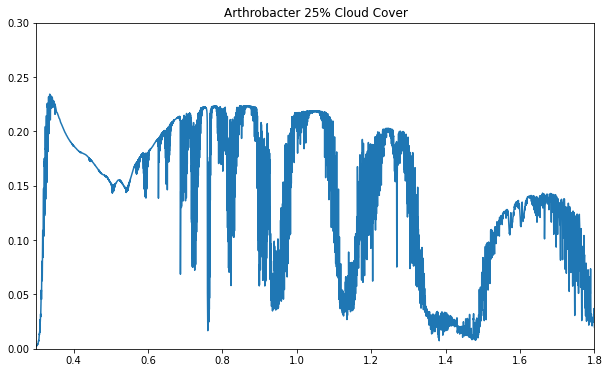

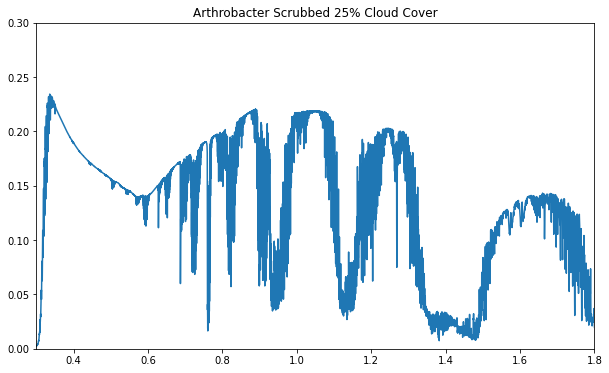

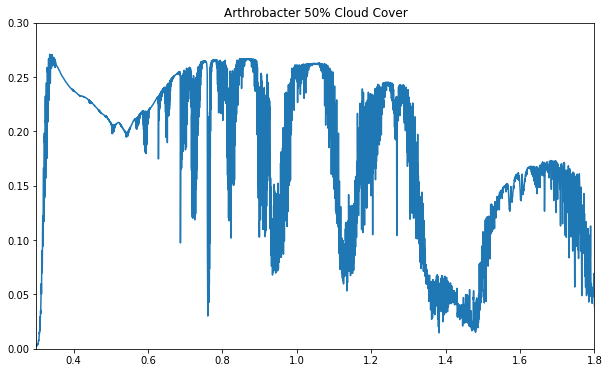

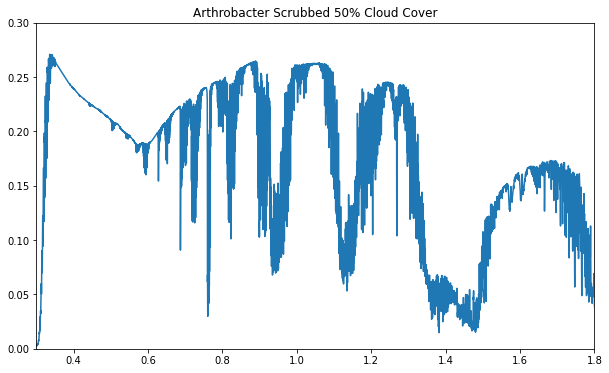

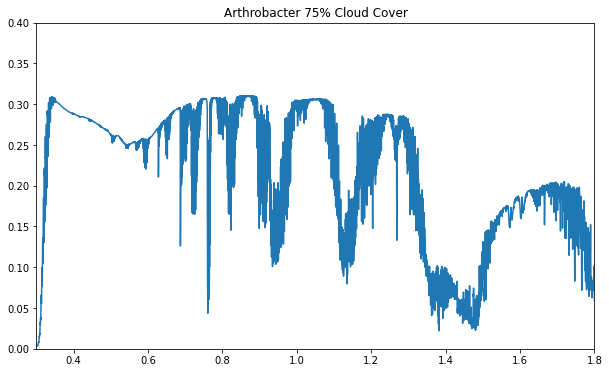

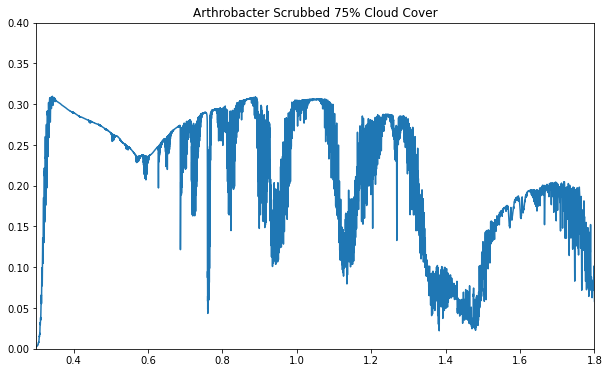

In [15]:
# plotting the mixed spectra
plt.figure(figsize=(10,6))
plt.plot(wave, mixed25)
plt.title(name + " 25% Cloud Cover")
plt.xlim(0.3, 1.8)
plt.ylim(0, 0.3)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(wave, mixed25_scrubbed)
plt.title(name + " Scrubbed 25% Cloud Cover")
plt.xlim(0.3, 1.8)
plt.ylim(0, 0.3)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(wave, mixed50)
plt.title(name + " 50% Cloud Cover")
plt.xlim(0.3, 1.8)
plt.ylim(0, 0.3)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(wave, mixed50_scrubbed)
plt.title(name + " Scrubbed 50% Cloud Cover")
plt.xlim(0.3, 1.8)
plt.ylim(0, 0.3)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(wave, mixed75)
plt.title(name + " 75% Cloud Cover")
plt.xlim(0.3, 1.8)
plt.ylim(0, 0.4)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(wave, mixed75_scrubbed)
plt.title(name + " Scrubbed 75% Cloud Cover")
plt.xlim(0.3, 1.8)
plt.ylim(0, 0.4)
plt.show()

In [16]:
#write the wavelength and reflectance to a file
#################
name = "Arthro"
#################

writetofile(name+"_mixed25.txt", wave, flux, mixed25, rad25)
writetofile(name+"_mixed25_scrubbed.txt", wave, flux, mixed25_scrubbed, rad25_scrubbed)

writetofile(name+"_mixed50.txt", wave, flux, mixed50, rad50)
writetofile(name+"_mixed50_scrubbed.txt", wave, flux, mixed50_scrubbed, rad50_scrubbed)

writetofile(name+"_mixed75.txt", wave, flux, mixed75, rad75)
writetofile(name+"_mixed75_scrubbed.txt", wave, flux, mixed75_scrubbed, rad75_scrubbed)

In [10]:
### Running new scrubbed Arthrobacter SMART spectra
### Edited by Schuyler

import matplotlib.pyplot as plt 
import os, glob
import numpy as np 
from astropy.io import ascii 
from astropy.table import Table
from astropy.table import Column

os.chdir('[enter path here]')

#####################################
name = "Arthrobacter"
files = glob.glob('Arthro*.rad')
print(files)
#####################################

data = ascii.read(files[0], data_start=0, delimiter='\s')

columnone = []
columnthree = []
wave = []
flux = []
size = len(data)
    
for i in range(size):
        
    columnone.append(float(data[i][0]))
    columnthree.append(float(data[i][2]))

wave = np.array(columnone)
flux = np.array(columnthree)

clearsky_scrub = ascii.read(files[0], data_start=0, delimiter='\s')
print("done1")

highcloud_scrub = ascii.read(files[2], data_start=0, delimiter='\s')
print("done3")

lowcloud_scrub = ascii.read(files[1], data_start=0, delimiter='\s')
print("done5")


cs_s_ref, cs_s_rad = getData(clearsky_scrub)
hc_s_ref, hc_s_rad = getData(highcloud_scrub)
lc_s_ref, lc_s_rad = getData(lowcloud_scrub)


import copy
import array as arr
# create a sum wavelength array that sums the reflectance of the all reflect at an index
# For each file in the reflectance data

scrubbedarray = [cs_s_ref, hc_s_ref, lc_s_ref]
scrubbedarray_rad = [cs_s_rad, hc_s_rad, lc_s_rad]

#25% cloud cover
percentage = [0.75, 0.125, 0.125]
mixed25_scrubbed, rad25_scrubbed = mixthemup(scrubbedarray, scrubbedarray_rad, percentage)

#50% cloud cover
percentage = [0.5, 0.25, 0.25]
mixed50_scrubbed, rad50_scrubbed = mixthemup(scrubbedarray, scrubbedarray_rad, percentage)

#75% cloud cover
percentage = [0.25, 0.375, 0.375]
mixed75_scrubbed, rad75_scrubbed = mixthemup(scrubbedarray, scrubbedarray_rad, percentage)



['Arthro_clearSky_scrub_v3_um_toa.rad', 'Arthro_lowcloud_scrub_v3_um_toa.rad', 'Arthro_highcloud_scrub_v3_um_toa.rad']


done1
done3
done5
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990
Size in method: 98990
Size in method: 98990
Size of refarray: 98990
Size of radarray: 98990
size fo ref: 98990
size fo ref: 98990
size fo ref: 98990


In [11]:
#write the wavelength and reflectance to a file
#################
name = "Arthro"
#################

writetofile(name+"_new_mixed25_scrubbed.txt", wave, flux, mixed25_scrubbed, rad25_scrubbed)

writetofile(name+"_new_mixed50_scrubbed.txt", wave, flux, mixed50_scrubbed, rad50_scrubbed)

writetofile(name+"_new_mixed75_scrubbed.txt", wave, flux, mixed75_scrubbed, rad75_scrubbed)